# Tas (Heap)

In [16]:
import include.tas as h

Un tas est un tableau que l'on se représente comme un arbre binaire complet. 

Il respecte la condition de tas 

* tout élément est plus grand (ou égal) que ses enfants
* tout élément est plus petit (ou égal) que son parent 

Par exemple, le tableau suivant est un tas

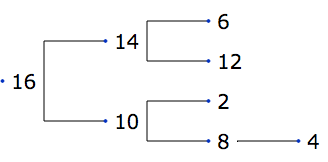

In [17]:
T = [ 16, 10, 14, 8, 2, 12, 6, 4]
h.afficher_tas(T)

## Indices

En numérotant les incides de $1$ à $n$,

* `T[i]` a pour enfants `T[2*i]` et `T[2*i+1]`
* `T[i]` a pour parent de `T[i // 2]`

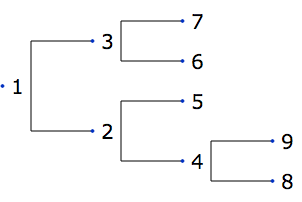

In [18]:
I1 = [ 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
h.afficher_tas(I1)

En numérotant de $0$ à $n-1$,

* `T[i]` a pour enfants `T[2*i+1]` et `T[2*i+2]`
* `T[i]` a pour parent de `T[(i-1) // 2]`

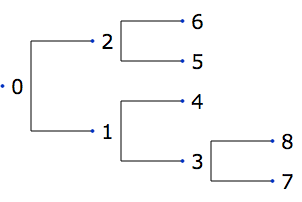

In [19]:
I0 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8 ]
h.afficher_tas(I0)

In [20]:
def parent(i): return (i-1) // 2
def enfants(i): return 2*i+1, 2*i+2

## Insertion

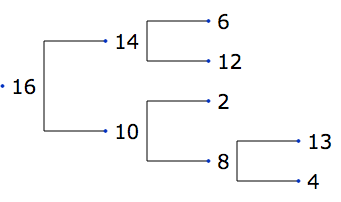

In [21]:
T.append(13)
h.afficher_tas(T)

In [22]:
def remonter(T,i):
    p = parent(i)
    while i > 0 and T[p] < T[i]:
        print("swap({},{})".format(T[i],T[p]))
        T[p],T[i] = T[i],T[p]
        i = p; p = parent(i)

swap(13,8)
swap(13,10)


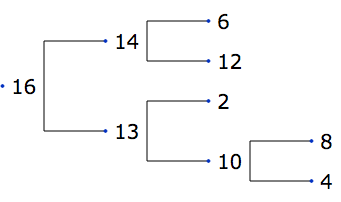

In [23]:
remonter(T,len(T)-1)
h.afficher_tas(T)

In [24]:
def inserer_dans_tas(T,val):
    T.append(val)
    remonter(T,len(T)-1)

## Suppression du maximum

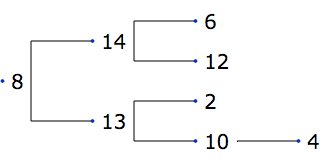

In [25]:
T[0],T[len(T)-1] = T[len(T)-1],T[0]
T.pop()
h.afficher_tas(T)

In [51]:
def descendre(T,i,n = len(T)):
    e1, e2 = enfants(i)
    while e1 < n:
        pge = e1 # plus grand enfant
        if e2 < n and T[e2] > T[e1]:
            pge = e2
        if T[i] > T[pge]:
            break
        T[i],T[pge] = T[pge],T[i]
        i = pge
        e1,e2 = enfants(i)

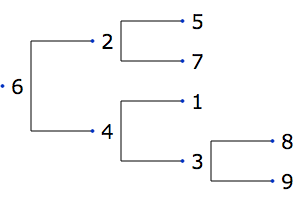

In [52]:
descendre(T,0)
h.afficher_tas(T)

In [53]:
def supprimer_du_tas(T):
    der = len(T)-1
    T[0],T[der] = T[der],T[0]
    descendre(T,0,der)
    T.pop()

## Création d'un tas

In [60]:
def creer_tas(T):
    dernier_parent = (len(T) // 2)-1
    for i in range(dernier_parent,-1,-1):
        descendre(T,i)

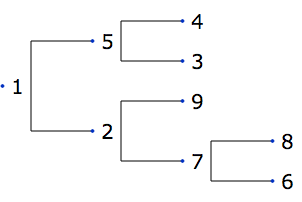

In [61]:
T = [ 1, 2, 5, 7, 9, 3, 4, 6, 8 ]
h.afficher_tas(T)

In [62]:
creer_tas(T)

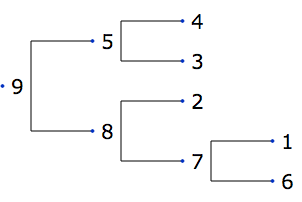

In [63]:
h.afficher_tas(T)

## Tri par tas 

In [70]:
def tri_par_tas(T):
    creer_tas(T)
    print(T)
    for i in range(len(T)-1,0,-1):
        T[i],T[0] = T[0],T[i]
        descendre(T,0,i)
        print(T[:i],T[i:])

In [71]:
T = [ 1, 2, 5, 7, 9, 3, 4, 6, 8 ]
tri_par_tas(T)

[9, 8, 5, 7, 2, 3, 4, 6, 1]
[8, 7, 5, 6, 2, 3, 4, 1] [9]
[7, 6, 5, 1, 2, 3, 4] [8, 9]
[6, 4, 5, 1, 2, 3] [7, 8, 9]
[5, 4, 3, 1, 2] [6, 7, 8, 9]
[4, 2, 3, 1] [5, 6, 7, 8, 9]
[3, 2, 1] [4, 5, 6, 7, 8, 9]
[2, 1] [3, 4, 5, 6, 7, 8, 9]
[1] [2, 3, 4, 5, 6, 7, 8, 9]
